- ## Escolha do modelo
- ## Treinamento do modelo
- ## Teste do modelo
- ## Armazenamento do modelo

In [91]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning
warnings.filterwarnings('ignore') # inibe a exibição de avisos de warning

In [92]:
# modelos de clusterização
from sklearn.cluster import KMeans # algoritmo de clusterização que agrupa dados com características similares em torno de centros (centroides).
from sklearn.cluster import AgglomerativeClustering # algoritmo de clustering hierárquico em que cada observação é inicialmente considerada um cluster e, em seguida, os clusters são recursivamente fundidos até que um único cluster contendo todas as observações seja formado. Este método determina a distância de ligação entre os clusters para decidir quais clusters devem ser fundidos. 
from sklearn.cluster import AffinityPropagation # algoritmo de agrupamento de dados que funciona com base no conceito de "passagem de mensagens" entre os pontos de dados. Ele é usado em aprendizado de máquina e análise de dados para identificar automaticamente um número ideal de clusters com base na similaridade dos dados. 
from scipy.cluster.hierarchy import linkage # realiza agrupamento hierárquico/aglomerativo. A entrada y pode ser uma matriz de distância condensada 1-D ou um array 2-D de vetores de observação.

from scipy.cluster.hierarchy import dendrogram # diagrama que representa uma árvore hierárquica. Essa representação diagramática é frequentemente usada em diferentes contextos: em clustering hierárquico, na análise filogenética e na visualização de dados hierárquicos.
from scipy.cluster.hierarchy import fcluster # utilizada para achatar um dendrograma e resulta na atribuição de pontos de dados originais a clusters únicos.
from scipy.cluster.hierarchy import cophenet # calcula as distâncias cophenéticas entre cada observação em uma análise de agrupamento hierárquico definida pelo link Z.
from scipy.spatial.distance import pdist # calcula as distâncias entre pares de observações em um espaço n-dimensional. Ela é útil para aplicações que envolvem cálculos de distância entre grandes coleções de vetores.

In [93]:
# métricas de avaliação dos modelos
from sklearn.metrics import adjusted_mutual_info_score # ajuste do escore de Informação Mútua (MI) para levar em conta a chance. Ele mede a similaridade entre dois conjuntos de clusters, ajustando o valor da Informação Mútua para a linha de base esperada quando os clusters são atribuídos aleatoriamente.
from sklearn import cluster # implementa algoritmos populares de agrupamento não supervisionado, como K-Means, BIRCH e Clustering Aglomerativo. Estes algoritmos permitem agrupar dados não rotulados em clusters com base em suas características.
from sklearn import covariance # fornece ferramentas para estimar com precisão a matriz de covariância de uma população sob várias configurações.
from sklearn import manifold # biblioteca de aprendizado de máquina de código aberto que fornece algoritmos de redução de dimensionalidade não linear, também conhecidos como aprendizado de manifold. Esses algoritmos são úteis para visualizar e analisar dados de alta dimensionalidade.

In [94]:
# preparação e visualização de dados
import numpy as np # computaçaõ de matrizes
from matplotlib import pyplot as plt # plotagem gráfica
import seaborn as sns # plotagem gráfica

from pandas.plotting import scatter_matrix # plotagem gráfica

import datetime

from sklearn.preprocessing import StandardScaler

In [95]:
import pandas_datareader as dr
import matplotlib.ticker as ticker 
from itertools import cycle

In [96]:
# carregando arquivo tratado em dataframe
df_card_trans = pd.read_csv('df_treated/df_card_trans.csv')

In [97]:
# conferindo a dimensão do dataframe, linhas e colunas
df_card_trans.shape

(8339, 35)

In [98]:
# ordenando pelo index o dataframe carregado
df_card_trans = df_card_trans.sort_index()

In [99]:
# reconhecendo as primeiras linhas do dataframe
df_card_trans.head(5)

,titular,saldo_cred_restante,freq_atu_saldo,qtde_compras,vr_max_compra_feita,vr_compra_feita_parcelas,dinh_adiantado_usu,freq_compras,freq_compras_1vez,freq_compras_parcelas,freq_pag_dinh_adiantado,trans_dinh_adiantado,trans_compra_feita,limite_cartao,vr_pag_feito_usu,vr_min_pagtos_feito_usu,%pag_integral_feito_usu,prazo_serv_cartao_usu,minmax__saldo_cred_restante,minmax__qtde_compras,minmax__vr_max_compra_feita,minmax__vr_compra_feita_parcelas,minmax__dinh_adiantado_usu,minmax__limite_cartao,minmax__vr_pag_feito_usu,minmax__vr_min_pagtos_feito_usu,power__freq_atu_saldo,power__freq_compras,power__freq_compras_1vez,power__freq_compras_parcelas,power__freq_pag_dinh_adiantado,power__trans_dinh_adiantado,power__trans_compra_feita,power__%pag_integral_feito_usu,power__prazo_serv_cartao_usu
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.002148,0.001945,0.000000,0.004240,0.000000,0.031720,0.003978,0.001826,-1.269589,-0.787010,-0.909176,-0.622043,-0.888595,-0.911869,-0.591497,-0.693374,0.417156
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.168169,0.000000,0.000000,0.000000,0.136685,0.232053,0.080892,0.014034,-0.594878,-1.285866,-0.909176,-1.012022,1.102197,1.025584,-1.392628,1.179060,0.417156
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.131026,0.015766,0.018968,0.000000,0.000000,0.248748,0.012263,0.008210,0.612641,1.211921,1.724959,-1.012022,-0.888595,-0.911869,0.472489,-0.693374,0.417156
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.095038,0.027188,0.000000,0.059257,0.000000,0.058431,0.027602,0.031506,0.612641,0.488440,-0.909176,0.782421,-0.888595,-0.911869,0.206232,-0.693374,0.417156
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,0.032939,0.144598,0.157076,0.030595,0.000000,0.449082,0.125278,0.002592,0.612641,1.211921,1.724959,1.371236,-0.888595,-0.911869,1.633374,1.851822,0.417156


In [100]:
# verificando a posição de cada variável
df_card_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   titular                           8339 non-null   object 
 1   saldo_cred_restante               8339 non-null   float64
 2   freq_atu_saldo                    8339 non-null   float64
 3   qtde_compras                      8339 non-null   float64
 4   vr_max_compra_feita               8339 non-null   float64
 5   vr_compra_feita_parcelas          8339 non-null   float64
 6   dinh_adiantado_usu                8339 non-null   float64
 7   freq_compras                      8339 non-null   float64
 8   freq_compras_1vez                 8339 non-null   float64
 9   freq_compras_parcelas             8339 non-null   float64
 10  freq_pag_dinh_adiantado           8339 non-null   float64
 11  trans_dinh_adiantado              8339 non-null   float64
 12  trans_

In [101]:
X = df_card_trans[list(df_card_trans.columns[18:])] 
X = X.drop(columns=(['power__freq_atu_saldo', 'power__freq_compras_1vez', 'power__freq_compras_parcelas',
                    'power__%pag_integral_feito_usu', 'power__prazo_serv_cartao_usu']), axis=1)

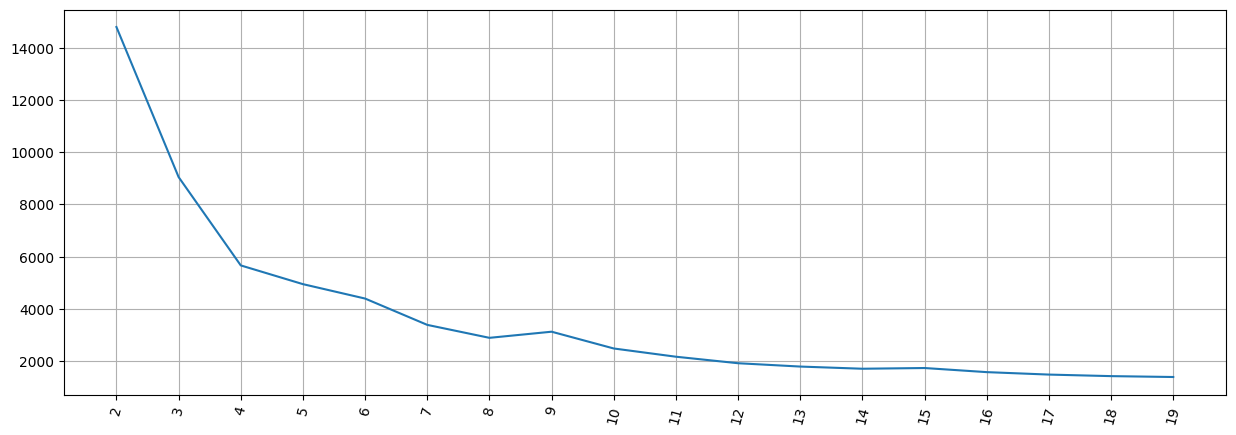

In [102]:
# método do cotovelo
# O método do cotovelo é uma técnica usada para determinar o número ideal de clusters em análise de agrupamento. Ele consiste em plotar a variância explicada (ou alguma outra métrica) em relação ao número de clusters e escolher o "cotovelo" da curva como o número ideal de clusters
# O método do cotovelo é comumente aplicado a algoritmos de agrupamento como o K-Means. Ele ajuda a encontrar o ponto em que adicionar mais clusters não traz mais muitos benefícios, indicando o número ideal de clusters para os dados
# Para aplicar o método do cotovelo, é necessário rodar o algoritmo de agrupamento (como K-Means) várias vezes com diferentes números de clusters, e então plotar a variância explicada (ou outra métrica) em relação ao número de clusters. O "cotovelo" da curva indica o número ideal de clusters a ser utilizado
distortions = [] 
max_loop=20 

for k in range(2, max_loop): 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    distortions.append(kmeans.inertia_) 
    
fig = plt.figure(figsize=(15, 5)) 
plt.plot(range(2, max_loop), distortions) 
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

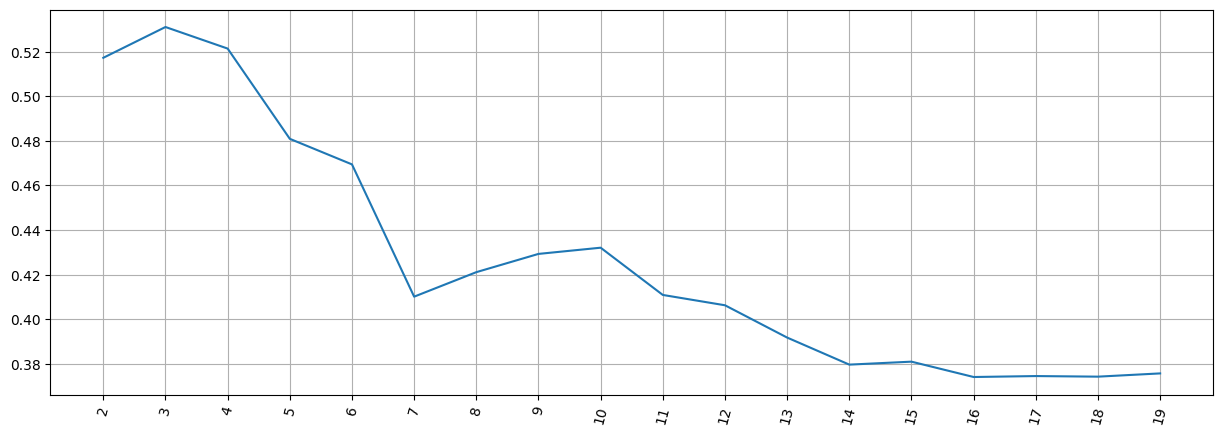

In [103]:
# método da silhueta
# O método da silhueta é uma técnica utilizada para determinar o número ideal de clusters em uma análise de agrupamento. Ele calcula um coeficiente de silhueta para cada ponto de dados, que varia de -1 a 1, indicando o quão bem o ponto está posicionado dentro do seu cluster
# Um valor de silhueta próximo a 1 indica que o ponto de dados está muito bem agrupado, enquanto valores próximos a -1 indicam que o ponto está mal agrupado. Em geral, valores acima de 0,5 são considerados bons, entre 0,2 e 0,5 são razoáveis, e abaixo de 0,2 são ruins. 
# A análise de silhueta pode ser usada para determinar o número ideal de clusters, examinando o gráfico de silhueta e escolhendo o número de clusters que resulta no maior valor médio de silhueta. Isso indica a melhor separação entre os clusters.
from sklearn import metrics 

silhouette_score = [] 

for k in range(2, max_loop): 
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10) #, n_jobs=-1) 
    kmeans.fit(X) 
    silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10)) 

fig = plt.figure(figsize=(15, 5)) 
plt.plot(range(2, max_loop), silhouette_score) 
plt.xticks([i for i in range(2, max_loop)], rotation=75) 
plt.grid(True)

In [104]:
nclust=4

#Ajustar com k-means 
k_means = cluster.KMeans(n_clusters=nclust) 
k_means.fit(X) 

KMeans(n_clusters=4)

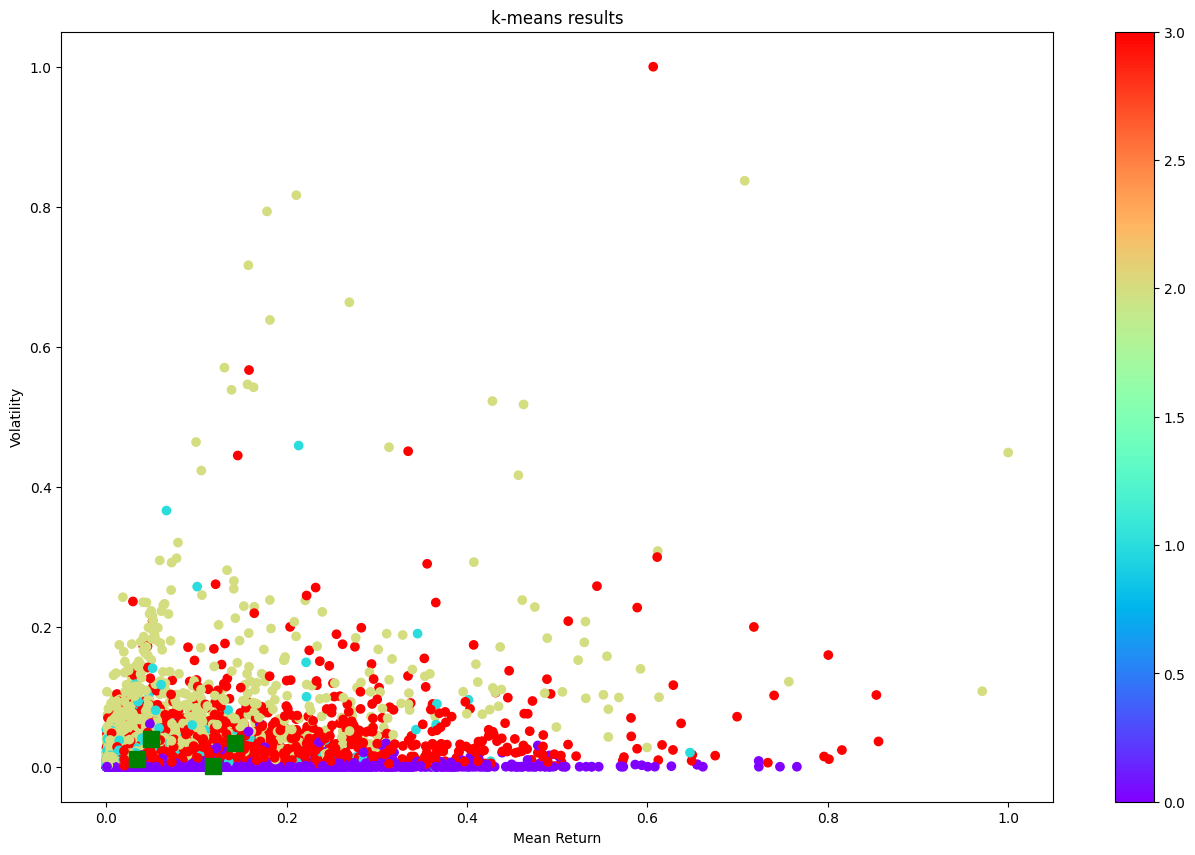

In [105]:
#Extrair rótulos 
target_labels = k_means.predict(X)

centroids = k_means.cluster_centers_ 
fig = plt.figure(figsize=(16,10)) 
ax = fig.add_subplot(111) 
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap='rainbow', label = X.index) 
ax.set_title('k-means results') 
ax.set_xlabel('Mean Return')

ax.set_ylabel('Volatility') 
plt.colorbar(scatter) 
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)


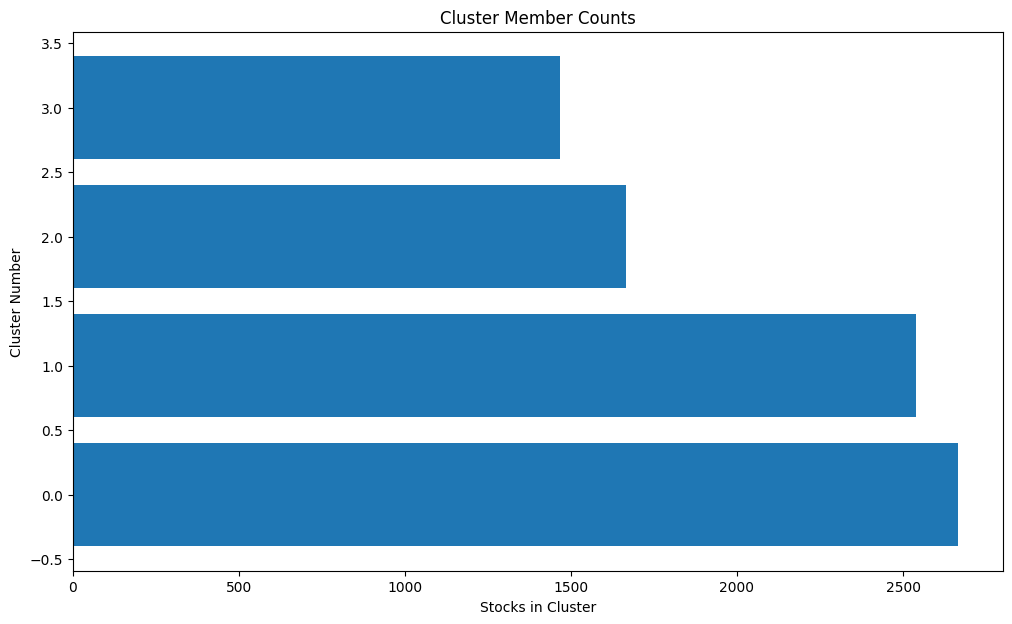

In [106]:
# mostrar o número de ações em cada cluster
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten()) 

# ação agrupada com seu rótulo de cluster 
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten()) 
clustered_series = clustered_series[clustered_series != -1] 
plt.figure(figsize=(12,7)) 
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts() ) 
plt.title('Cluster Member Counts') 
plt.xlabel('Stocks in Cluster') 
plt.ylabel('Cluster Number') 
plt.show()

In [107]:
# DENDROGRAM
from scipy.cluster.hierarchy import dendrogram, linkage, ward 

#Calcular linkage 
Z= linkage(X, method='ward') 
Z[0]

array([1.05900000e+03, 6.53800000e+03, 2.88928397e-04, 2.00000000e+00])

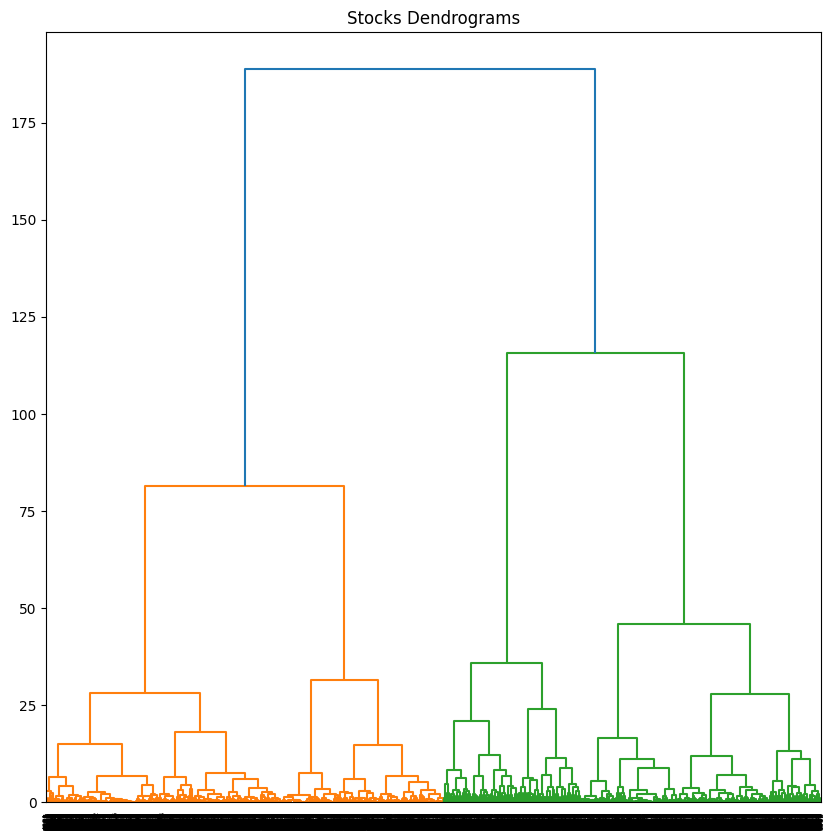

In [108]:
#Plotar Dendrograma 
plt.figure(figsize=(10, 10)) 
plt.title('Stocks Dendrograms') 
dendrogram(Z,labels = X.index) 
plt.show()